# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)


## Introduction/Background

For this project, I will be using the [Emotion](https://huggingface.co/datasets/emotion) dataset from Hugging Face. It is a collection of 20,000 English Tweets that are categorized by the emotion of the tweet. The emotions represented are: anger, fear, joy, love, sadness, and surprise. The dataset was created for a [2018 paper on emotion recognition](https://aclanthology.org/D18-1404/). 


## Exploratory Data Analysis

This dataset contains 20,000 entries split into 16,000 training, 2,000 validation, and 2,000 testing. I first performed a simple count and normalization of the labels. The emotion with the highest proportion is joy, followed closely by sadness. Both of those two labels greatly outnumber the others. The counts, proportions and bar graph can be found below. Additionally, the first ten entries in the training data can be found below.

Each observation in the dataset is a tweet, so no more than 280 characters. However, the number of words can vary. The average tweet length amongst all splits is 19.13 words. After examining the size and proportions of the dataset, I began tokenizing the tweets, by word, and removing stopwords. I found that 'feel', 'feeling', and 'like' are the top three words used in this dataset.


In [ ]:
# import all of the python modules/packages you'll need here
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("emotion")
#print(dataset['train'].column_names)
#print(dataset['train'].features)
#dataset['train'][0:10]

#dataset.set_format(type='torch', columns=['text', 'label'])
#dataloader = torch.utils.data.DataLoader(dataset['train'], batch_size=32)
#print(type(dataloader))
#next(iter(dataloader))

   Counts  Proportion    Labels
0    5797    0.291625   sadness
1    6761    0.335125       joy
2    1641    0.081500      love
3    2709    0.134937     anger
4    2373    0.121063      fear
5     719    0.035750  surprise


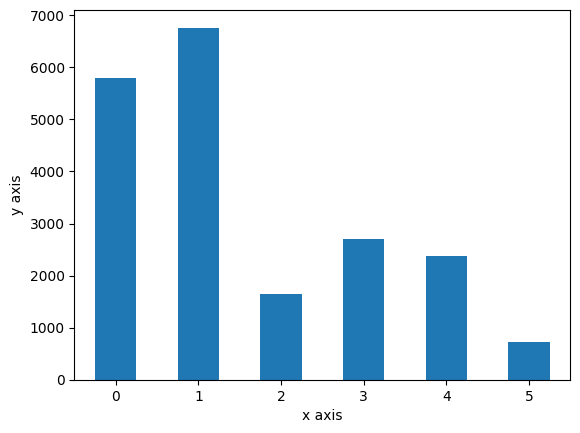

                                                text label
0                            i didnt feel humiliated     0
1  i can go from feeling so hopeless to so damned...     0
2   im grabbing a minute to post i feel greedy wrong     3
3  i am ever feeling nostalgic about the fireplac...     2
4                               i am feeling grouchy     3
5  ive been feeling a little burdened lately wasn...     0
6  ive been taking or milligrams or times recomme...     5
7  i feel as confused about life as a teenager or...     4
8  i have been with petronas for years i feel tha...     1
9                                i feel romantic too     2


In [31]:
# Set dataset format to pandas
dataset.set_format(type='pandas', columns=['text','label'])

# Count and normalize number of labels
counts = dataset['train']['label'].value_counts() + dataset['validation']['label'].value_counts() + dataset['test']['label'].value_counts()
counts = counts.rename('Counts')
counts_norm = dataset['train']['label'].value_counts(normalize=True)
counts_norm = counts_norm.rename('Proportion')

# Generate dataframe of total counts and proportions
labels = pd.Series(dataset['train'].features['label'].names)
labels = labels.rename('Labels')
totals = pd.concat([counts.sort_index(), counts_norm.sort_index(), labels], axis=1)
print(totals)

# Create a bar chart of counts
graph = counts.sort_index().plot.bar(rot=0)
graph.set(xlabel='Labels', ylabel='Quantity')
plt.show()

# Show the first 10 entries
print(pd.DataFrame([dataset['train']['text'], dataset['train']['label']]).transpose().head(10))



In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

# Tokenize tweets
df = dataset['train']
#tokens = pd.Series(df['text'].str.lower().str.split())

tk = TweetTokenizer()
tokens = pd.Series(df['text'].apply(lambda x: tk.tokenize(x.lower())))
tokens.head()

# Remove stop words
stops = set(stopwords.words('english'))
chars2remove = set(['.','!','/', '?'])
tokens = tokens.apply(lambda x: [w for w in x if w not in stops])
tokens = tokens.apply(lambda x: [w for w in x if w not in chars2remove])
tokens = tokens.apply(lambda x: [w for w in x if not re.match('^#', w)]) # remove hashtags

# Create dictionary of words in tweets
vocab = dict()
for tweet_tokens in tokens:
    for token in tweet_tokens:
        if token not in vocab:
            vocab[token] = 1
        else:
            vocab[token] += 1

len(vocab)

vocab_sorted = dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True))
list(vocab_sorted.items())[:25]

[('feel', 11183),
 ('feeling', 5112),
 ('like', 2908),
 ('im', 2430),
 ('really', 942),
 ('know', 853),
 ('time', 794),
 ('get', 740),
 ('little', 736),
 ('people', 654),
 ('would', 646),
 ('want', 644),
 ('think', 596),
 ('one', 596),
 ('still', 595),
 ('ive', 587),
 ('even', 568),
 ('life', 551),
 ('make', 523),
 ('bit', 516),
 ('something', 513),
 ('love', 500),
 ('much', 496),
 ('going', 487),
 ('dont', 482)]

In [29]:

# Combine splits into one Series
raw_tokens_train = pd.Series(dataset['train']['text'].str.lower().str.split())
raw_tokens_val = pd.Series(dataset['validation']['text'].str.lower().str.split())
raw_tokens_test = pd.Series(dataset['test']['text'].str.lower().str.split())
raw_tokens = pd.concat([raw_tokens_train, raw_tokens_val, raw_tokens_test], axis = 0, ignore_index=True)

print(raw_tokens[:10])

# Find the average word length or the tweets
total_length = 0
for i in range(len(raw_tokens)):
    print(i, end='\r')
    x = len(raw_tokens[i])
    total_length += x
average_length = total_length / len(raw_tokens)
print(f'Average Length: {average_length} words')

0                         [i, didnt, feel, humiliated]
1    [i, can, go, from, feeling, so, hopeless, to, ...
2    [im, grabbing, a, minute, to, post, i, feel, g...
3    [i, am, ever, feeling, nostalgic, about, the, ...
4                            [i, am, feeling, grouchy]
5    [ive, been, feeling, a, little, burdened, late...
6    [ive, been, taking, or, milligrams, or, times,...
7    [i, feel, as, confused, about, life, as, a, te...
8    [i, have, been, with, petronas, for, years, i,...
9                             [i, feel, romantic, too]
Name: text, dtype: object
Average Length: 19.13505 words


In [6]:
X_train = dataset['train']['text'].copy()
Y_train = dataset['train']['label'].copy()

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])